# Predicating Medical No show - Randan forest, Gradient Bossting, kernel SVM, and Stacking

In [3]:
#import libarary
import sys
import scipy
import numpy as np
import matplotlib
import pylab
import seaborn as sns
import pandas as pd
import sklearn
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#model report and sklearn package
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from scipy import stats


/Users/jasonwu/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jasonwu/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
#load data

med_Aptdata = pd.read_csv("KaggleV2-May-2016.csv",na_values='?')

In [7]:
#look at data struture
med_Aptdata.info()
print  'data struture(row, colunm) : ', med_Aptdata.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
data struture(row, colunm) :  (110527, 14)


In [47]:
# first 10 row
med_Aptdata.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [11]:
med_Aptdata.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



## data discription and goal


11057 observation and 14 variables.

target(categorical) : No_show : Yes = no show, no = show up,
13 factors

useful precitors(age,neighborhood, scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,gender, appointdate, scheduledate)

8 categorical predictor and 2 numerical predictors


## data cleaning

After the first look at dataset. here are the few thing i m going to do to prepare the data 

1. check for missing variable and take care of missing value
2. relable the datatype
3. drop useless variable

In [5]:
#check missing values
print "attribute with missing values: \n"
print [col for col in med_Aptdata.columns if med_Aptdata[col].isnull().any()]

attribute with missing values: 

[]


No missign value

In [6]:
#drop useless columns
med_Aptdata.drop(['PatientId','AppointmentID'], axis=1, inplace = True)

In [7]:
#relable categorical datatype to str
med_Aptdata.Scholarship=med_Aptdata.Scholarship.astype(str)
med_Aptdata.Hipertension=med_Aptdata.Hipertension.astype(str)
med_Aptdata.Diabetes=med_Aptdata.Diabetes.astype(str)
med_Aptdata.Alcoholism=med_Aptdata.Alcoholism.astype(str)
med_Aptdata.Handcap=med_Aptdata.Handcap.astype(str)
med_Aptdata.SMS_received=med_Aptdata.SMS_received.astype(str)



In [39]:
med_Aptdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hipertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handcap           110527 non-null object
SMS_received      110527 non-null object
No-show           110527 non-null object
dtypes: int64(1), object(11)
memory usage: 10.1+ MB


In [16]:
med_Aptdata.describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


age min = -1 make no sense.

In [17]:
med_Aptdata[med_Aptdata.Age < 0].count()

Gender            1
ScheduledDay      1
AppointmentDay    1
Age               1
Neighbourhood     1
Scholarship       1
Hipertension      1
Diabetes          1
Alcoholism        1
Handcap           1
SMS_received      1
No-show           1
dtype: int64

In [8]:
#only ONE record has age < 0 so remove it wont hurt
med_Aptdata= med_Aptdata[med_Aptdata['Age'] >= 0]

In [20]:
med_Aptdata[med_Aptdata.Age < 0].count()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [14]:

med_Aptdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null object
Hipertension      110526 non-null object
Diabetes          110526 non-null object
Alcoholism        110526 non-null object
Handcap           110526 non-null object
SMS_received      110526 non-null object
No-show           110526 non-null object
dtypes: int64(1), object(11)
memory usage: 11.0+ MB


In [22]:
med_Aptdata.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#new colum, waitday  (day between ScheduledDay  and AppointmentDay)
import numpy as np

# Converts the two variables to datetime variables
med_Aptdata['ScheduledDay'] = pd.to_datetime(med_Aptdata['ScheduledDay'])
med_Aptdata['AppointmentDay'] = pd.to_datetime(med_Aptdata['AppointmentDay'])

# Create a variable called "waitday" by subtracting the date.
med_Aptdata['waitday'] = med_Aptdata["AppointmentDay"].sub(med_Aptdata["ScheduledDay"], axis=0)

# Convert the result "waitday" to number of days between appointment day and scheduled day. 
med_Aptdata["waitday"] = (med_Aptdata["waitday"] / np.timedelta64(1, 'D')).abs().apply(np.floor)



In [14]:
med_Aptdata.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waitday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.0


In [10]:
med_Aptdata.drop(['ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [11]:
med_Aptdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
Gender           110526 non-null object
Age              110526 non-null int64
Neighbourhood    110526 non-null object
Scholarship      110526 non-null object
Hipertension     110526 non-null object
Diabetes         110526 non-null object
Alcoholism       110526 non-null object
Handcap          110526 non-null object
SMS_received     110526 non-null object
No-show          110526 non-null object
waitday          110526 non-null float64
dtypes: float64(1), int64(1), object(9)
memory usage: 10.1+ MB


Innitial data cleaning done. Now, we have two numerical attributes(Age and waitday), and 8 categorical attributes.

# Exploratory

## Univariate

numerical

In [27]:
med_Aptdata.describe()

,Age,waitday
count,110526.000000,110526.000000
mean,37.089219,9.532915
std,23.110026,15.027724
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,3.000000
75%,55.000000,14.000000
max,115.000000,178.000000


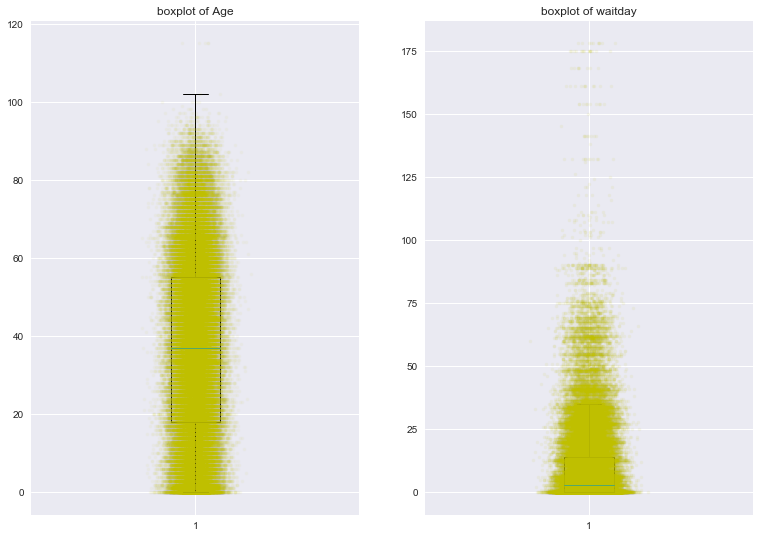

In [28]:
#boxplot

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(2,3,1) 
bp= ax1.boxplot(med_Aptdata['Age'])
y = med_Aptdata.Age
x = np.random.normal(1, 0.04, size=len(y))
ax1.plot(x,y, 'y.', alpha=0.05)
ax1.set_title("boxplot of Age")
ax2 = fig.add_subplot(2,3,2) 
bp2= ax2.boxplot(med_Aptdata['waitday'])
y2 = med_Aptdata.waitday
x2 = np.random.normal(1, 0.04, size=len(y2))
ax2.plot(x2,y2, 'y.', alpha=0.08)
ax2.set_title("boxplot of waitday")
plt.show()

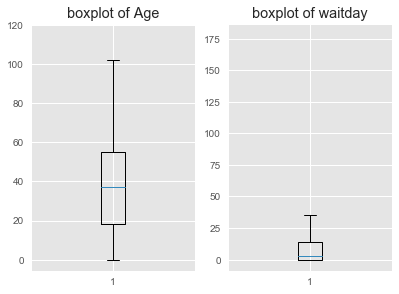

In [29]:
#box plot  and histogram
import matplotlib.pyplot as plt
import pylab
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline


fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2,3,1) 
ax1.boxplot(med_Aptdata['Age'])
ax1.set_title("boxplot of Age")
ax2 = fig.add_subplot(2,3,2) 
ax2.boxplot(med_Aptdata['waitday'])
ax2.set_title("boxplot of waitday")

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115d4c610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1152846d0>]], dtype=object)

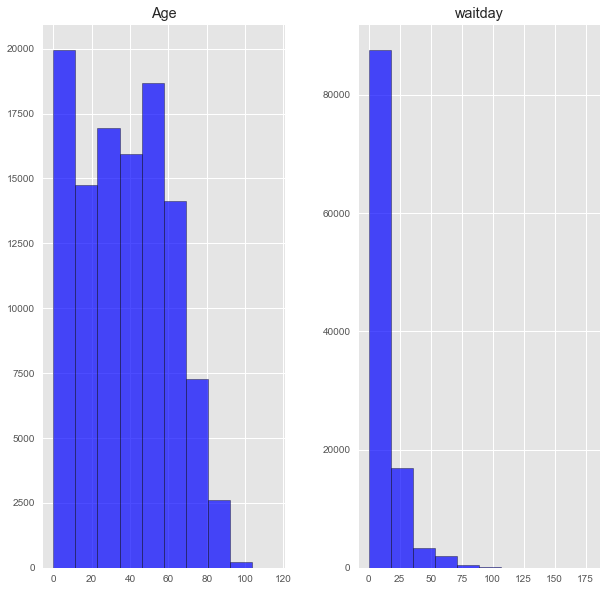

In [30]:
#histogram
plt.figure()
med_Aptdata[['Age', 'waitday']].hist(color='blue',alpha=0.7,edgecolor="black",figsize=(10, 10) )

there are few outlier in age but based on box plot and histogram, it doent look like it will affect our model building latr. On the other hand, have long tail on the right (right skwenness) in waitday meaning that we have some extreme high values for waitday and it may cause problem for prediction. there are many way  such as over/under sampling , transformation  to address (skewnness) issue. In this case, I will use biinning method to try to group large value togather and  balance out the distribution since it will be more interpretable and help to solve the outlier issue.  




most obeservation are under age ~70.

most people make appoitment fo no later than a month


In [12]:
#additional preparation after exploring the data(binning the waitday)
# group: (sameday, 0; withinweek,7. over_a_month,30 )

bins = [-1,2,7,14,30,360]
labels = ["wihtinTwoDay", "Week", "TwoWeeks", "Month","MoreThanAMonth"]
wait_period = pd.cut(med_Aptdata['waitday'], bins, labels=labels)
med_Aptdata['Wait_period'] = wait_period

In [13]:
med_Aptdata.drop(['waitday'],axis=1,inplace=True)

In [13]:
med_Aptdata.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Wait_period
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,wihtinTwoDay
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,wihtinTwoDay
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,wihtinTwoDay
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,wihtinTwoDay
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,wihtinTwoDay


Categorical

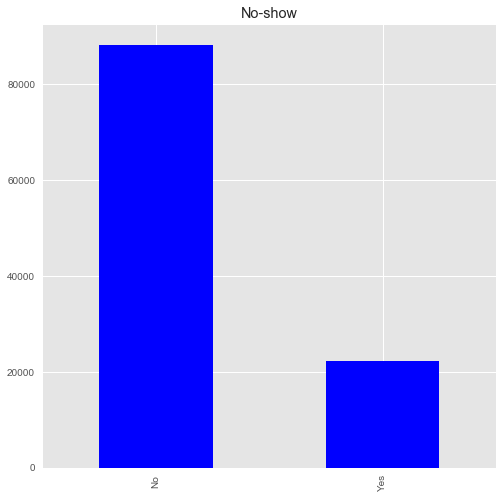

No-show
No     79.806561
Yes    20.193439
dtype: float64

In [34]:
#bar plot target: noshow 

a=['No-show']
fig = plt.figure(figsize=(20, 20))
for i in range(len(a)):
    
    ax=fig.add_subplot(3,3,i+1)
    ax.set_title(a[i])
    med_Aptdata[a[i]].value_counts().plot(kind='bar',color='blue')
fig.tight_layout()
plt.show()

#percentable table
med_Aptdata.groupby('No-show').size() * 100 / len(med_Aptdata)

target is inbalance! 80% of observation does not miss appoitment. only 20% miss the appoitment. Need to consider about the inbalanced target when we build models

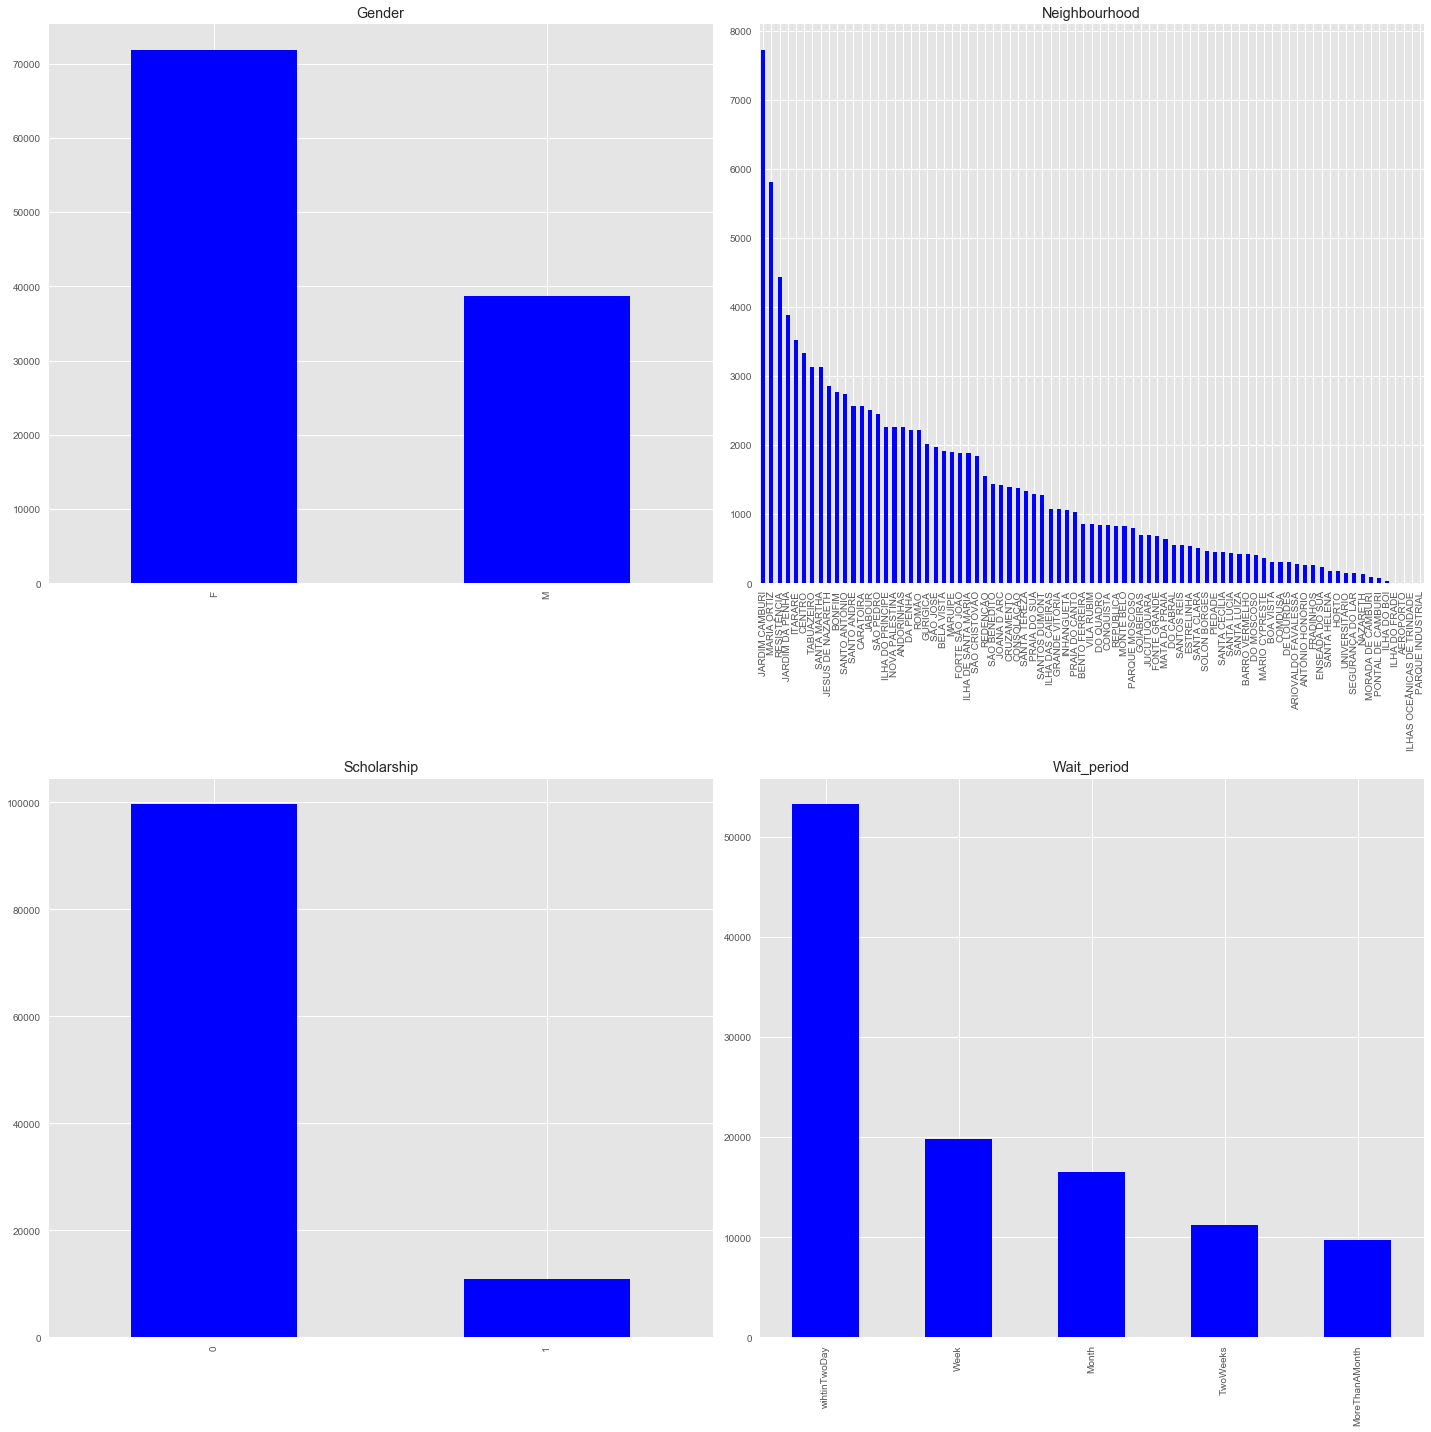

In [35]:

#bar plot 1
a=['Gender','Neighbourhood','Scholarship','Wait_period']
fig = plt.figure(figsize=(20, 20))
for i in range(len(a)):
    
    ax=fig.add_subplot(2,2,i+1)
    ax.set_title(a[i])
    med_Aptdata[a[i]].value_counts().plot(kind='bar',color='blue')
fig.tight_layout()
plt.show()

for  our obesravation, we have more case in female than male. most poepl's waitday is within 2 days. most people dont recieved scholarship(special offer)

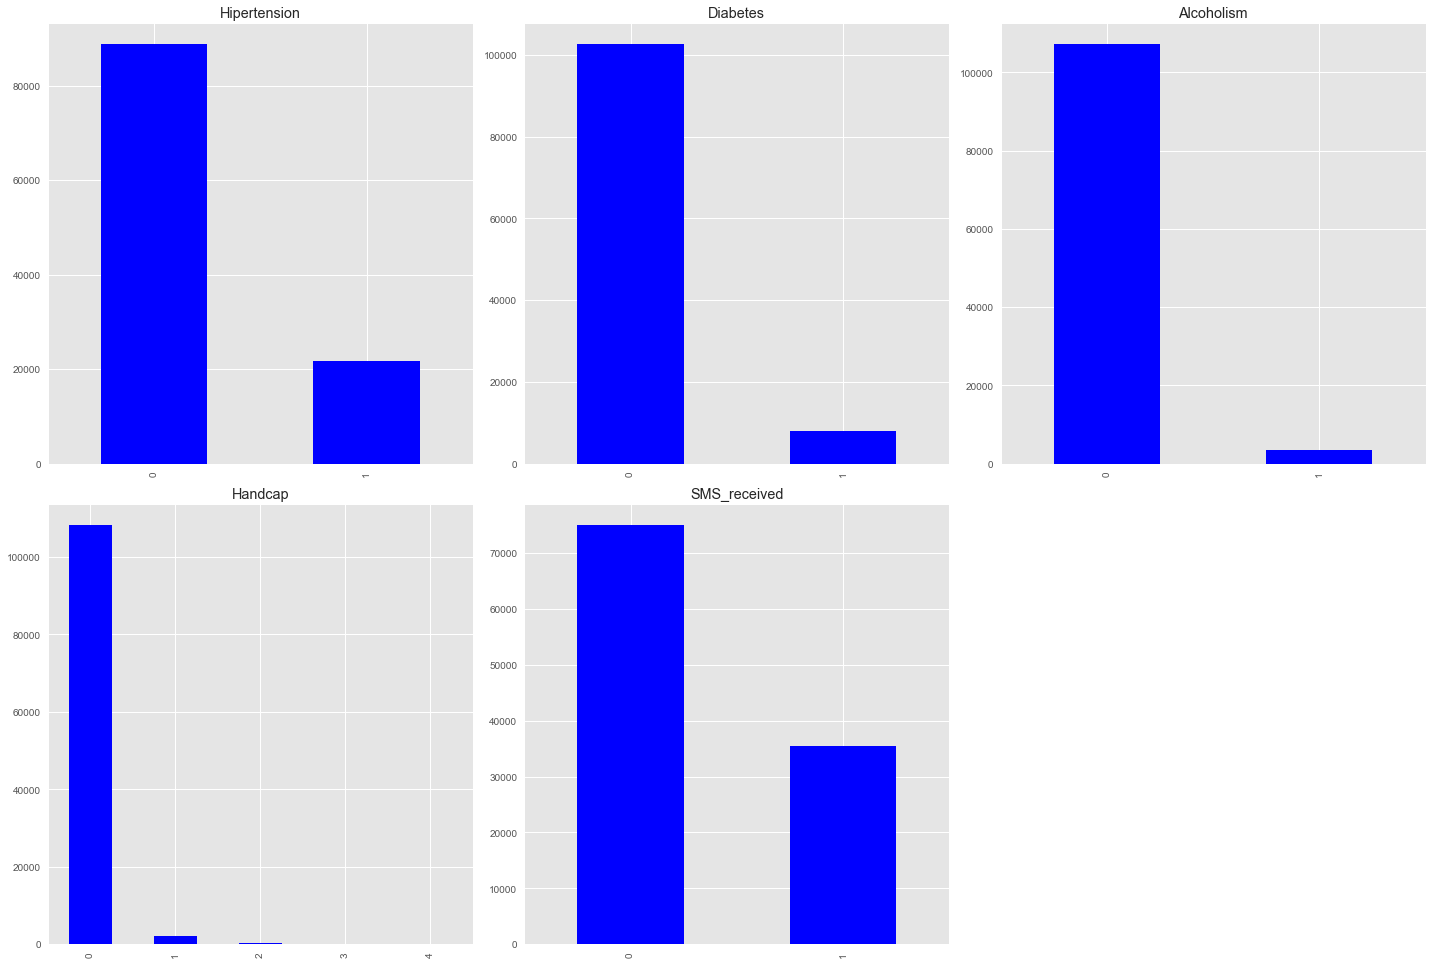

In [166]:
#bat plot 2
a=['Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
fig = plt.figure(figsize=(20, 20))
for i in range(len(a)):
    
    ax=fig.add_subplot(3,3,i+1)
    ax.set_title(a[i])
    med_Aptdata[a[i]].value_counts().plot(kind='bar',color='blue')
fig.tight_layout()
plt.show()

In [200]:
#percentable table
med_Aptdata.groupby('SMS_received').size() * 100 / len(med_Aptdata)

SMS_received
0    67.897146
1    32.102854
dtype: float64

Also, majorraity of people doesnt have any labeled conditions(such as Diabetes, alchoholism, handicap..etc). 

~67% of people signed up for sms reminder and ~32 are not.

## mutivariate

#### Age vs noshow


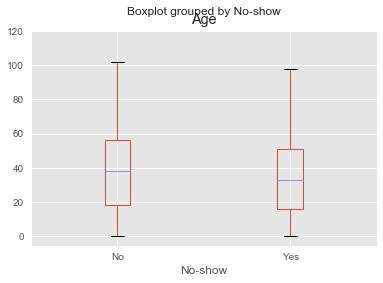

In [174]:
# box plot by survive for numerical

fig = plt.figure(figsize=(30, 30))

a= med_Aptdata.boxplot(column= 'Age',by='No-show')


plt.show()

in general, people who miss the appointment tend to be younger.

In [251]:
#Anova test
import scipy.stats as stats

stats.f_oneway(med_Aptdata.loc[med_Aptdata['No-show'] == 'Yes','Age'],med_Aptdata.loc[med_Aptdata['No-show'] == 'No','Age'])

F_onewayResult(statistic=403.70201903382997, pvalue=1.2461264409419246e-89)

Statistically comfimed that there are significant evidence that age is correlated with noshow based on anova test (p value < 0.05 indicates that mean of ages for two group(noshow vs show) are differnt )

#### Comparing no show rate between groups for each categorical attributes

In [216]:
#Cross table percentagewise
attributes =['Gender','Neighbourhood','Scholarship','Wait_period','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

for i in attributes:
    print 'percentage cross table (* Comapring No- show = yes) :', '  ', i
    print pd.crosstab(med_Aptdata[i],med_Aptdata["No-show"]).apply(lambda x: x/x.sum(), 1)
    print ''
    print ''
    print ''

percentage cross table (* Comapring No- show = yes) :    Gender
No-show        No       Yes
Gender                     
F        0.796851  0.203149
M        0.800321  0.199679



percentage cross table (* Comapring No- show = yes) :    Neighbourhood
No-show                    No       Yes
Neighbourhood                          
AEROPORTO            0.875000  0.125000
ANDORINHAS           0.769673  0.230327
ANTÔNIO HONÓRIO      0.815498  0.184502
ARIOVALDO FAVALESSA  0.780142  0.219858
BARRO VERMELHO       0.784870  0.215130
BELA VISTA           0.798637  0.201363
BENTO FERREIRA       0.775058  0.224942
BOA VISTA            0.814103  0.185897
BONFIM               0.801659  0.198341
CARATOÍRA            0.769591  0.230409
CENTRO               0.789142  0.210858
COMDUSA              0.819355  0.180645
CONQUISTA            0.811543  0.188457
CONSOLAÇÃO           0.827762  0.172238
CRUZAMENTO           0.782546  0.217454
DA PENHA             0.806495  0.193505
DE LOURDES           0.845902 

some significant differnt between group can be detected for some attribute which indicate that we may have some good predictor.


For example:

for gender : female and male no show rate are not significantly different (20% vs 19%)

for neighbor : PARQUE INDUSTRIAL has 0% no show rate.

for Wait_period: no show rate is significant lower for waittime withintwoday( 0.09% ) than other groups (25%-33%)

for handicap: Handicap_4 has significantly higher no show rate(33%) compare to the other groups(17%-23%) 

for sms recievied: surpringly , people who are given sms remider are 9% more likley to miss the appointment. 


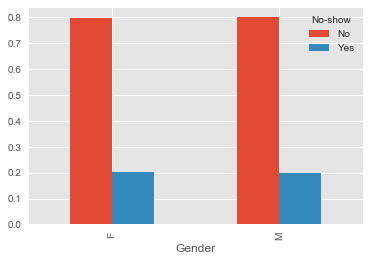

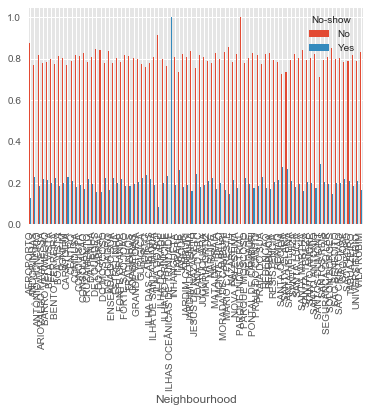

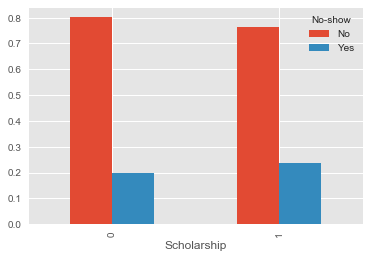

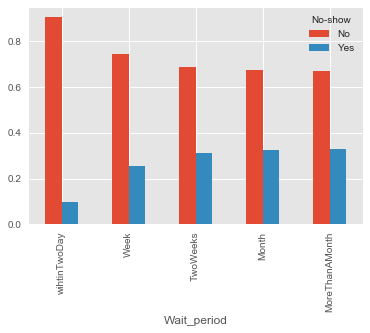

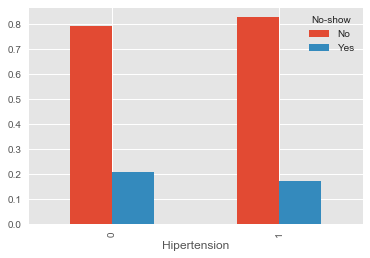

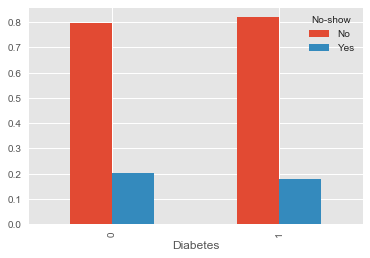

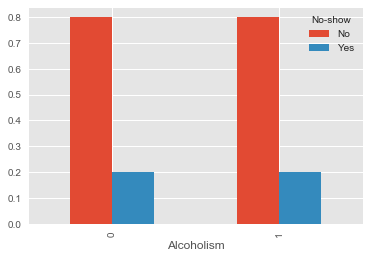

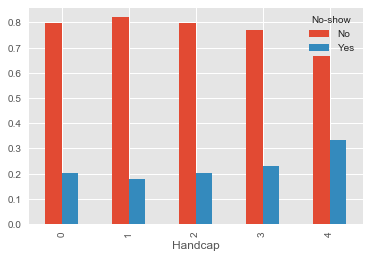

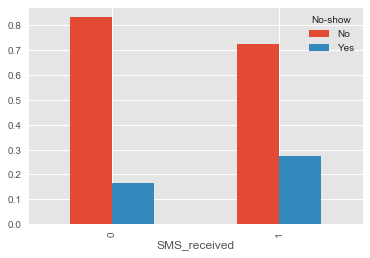

In [222]:
#stack bar plot by survive for categorical
attributes =['Gender','Neighbourhood','Scholarship','Wait_period','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

for i in attributes:
    pd.crosstab(med_Aptdata[i],med_Aptdata["No-show"]).apply(lambda x: x/x.sum(), 1).plot.bar()


Visulization version of the crosstable

In [243]:
from scipy import stats
attributes =['Gender','Neighbourhood','Scholarship','Wait_period','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

for i in attributes:
    a= pd.crosstab(med_Aptdata[i],med_Aptdata["No-show"])
    g, p, dof, expctd = scipy.stats.chi2_contingency(a)
    print 'P-value for chi-square test of independency for ',i,': ', p

P-value for chi-square test of independency for  Gender :  0.173034161737
P-value for chi-square test of independency for  Neighbourhood :  1.52439814251e-60
P-value for chi-square test of independency for  Scholarship :  3.9268156991e-22
P-value for chi-square test of independency for  Wait_period :  0.0
P-value for chi-square test of independency for  Hipertension :  1.90112122415e-32
P-value for chi-square test of independency for  Diabetes :  4.83964682088e-07
P-value for chi-square test of independency for  Alcoholism :  0.965205424901
P-value for chi-square test of independency for  Handcap :  0.13401931355
P-value for chi-square test of independency for  SMS_received :  0.0


for comfirmation of corrlation, for chi-square test of independency give us more clear idea:

the result shows there are significant evidence that no-show is correlated with following attributes:

Neighbourhood, Scholarship, Wait_period,Hipertension,Diabetes,and SMS_received.



##  innitail feature selection

In [14]:
# Neighbourhood has too many level, do the intial  prediction with and without neigborhood ######
#and comapre performance using ttest to see if dropping Neighbourhood will affect our prediction


#####trial --- with neigborhood, x_mat1,y1 ######
trial = med_Aptdata
# Separate the target attribute ("No-show")
# x : predictors, y : target
x1 = trial.drop("No-show", axis=1, inplace = False)
y1 = trial["No-show"]

#Convert the selected dataset into the Standard Spreadsheet format

# get_dummies" function to create dummy variables and converting to standard spreadsheet format
x_mat1 = pd.get_dummies(x1)
x_mat1.head(5)
y1=pd.get_dummies(y1)
y1.head()
#no show up [1: noshow, 0: show]
y1=y1['Yes']

#80-20 split
from sklearn.cross_validation import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_mat1, y1, test_size=0.2, random_state=33)





#####trial 2 --- without neigborhood ######
trial2 = med_Aptdata.drop(['Neighbourhood'], axis=1, inplace = False)
# Separate the target attribute ("No-show")
# x : predictors, y : target
x2 = trial2.drop("No-show", axis=1, inplace = False)
y2 = trial2["No-show"]

#Convert the selected dataset into the Standard Spreadsheet format
# get_dummies" function to create dummy variables and converting to standard spreadsheet format
x_mat2 = pd.get_dummies(x2)
y2=pd.get_dummies(y2)
#no show up [1: noshow, 0: show]
y2=y2['Yes']

#80-20 split
from sklearn.cross_validation import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_mat2, y2, test_size=0.2, random_state=33)

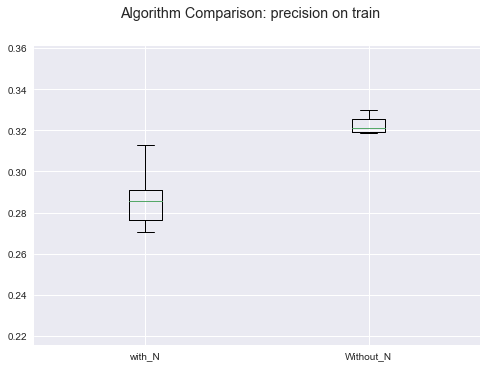

Ttest_relResult(statistic=-7.8154107711311518, pvalue=2.6660057229277099e-05)

In [88]:
#comapre model wiht NB
cv_N = model_selection.cross_val_score(GaussianNB(), x_train1, y_train1, cv=10,scoring='precision')
cv_Non = model_selection.cross_val_score(GaussianNB(), x_train2, y_train2, cv=10,scoring='precision')

results = [cv_N,cv_Non]
names = ['with_N','Without_N']


# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison: precision on train')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# paried t test to compare two model(Random forest vs gradient boosting)
from scipy import stats
stats.ttest_rel(cv_N, cv_Non)

In [70]:
# Make predictions on test dataset (NB)
NB= GaussianNB()
NB.fit(x_train1, y_train1)
NBpd = NB.predict(x_test1)
print('Prediction report: NB')
print '\n'
print'accuracy: %0.3f' % accuracy_score(y_test1, NBpd)
print '\n'
print 'confusion matrix: '
print confusion_matrix(y_test1, NBpd)
print '\n'
print 'classification report wiht N : '
print(classification_report(y_test1, NBpd))

Prediction report: NB


accuracy: 0.657


confusion matrix: 
[[12896  4682]
 [ 2911  1617]]


classification report wiht N : 
             precision    recall  f1-score   support

          0       0.82      0.73      0.77     17578
          1       0.26      0.36      0.30      4528

avg / total       0.70      0.66      0.68     22106



In [72]:
# Make predictions on test dataset (NB)
NB= GaussianNB()
NB.fit(x_train2, y_train2)
NBpd = NB.predict(x_test2)
print('Prediction report: NB')
print '\n'
print'accuracy: %0.3f' % accuracy_score(y_test2, NBpd)
print '\n'
print 'confusion matrix: '
print confusion_matrix(y_test2, NBpd)
print '\n'
print 'classification report wihtout N : '
print(classification_report(y_test2, NBpd))

Prediction report: NB


accuracy: 0.762


confusion matrix: 
[[16075  1503]
 [ 3757   771]]


classification report wihtout N : 
             precision    recall  f1-score   support

          0       0.81      0.91      0.86     17578
          1       0.34      0.17      0.23      4528

avg / total       0.71      0.76      0.73     22106



Surprisingly, the average precison is better without attribute neighbor , t test also comfirm there are significant differnece in average accuracy between two

Therefore, dropping attribute neighboorhood not only wont hurt the result but improve the result and it simplified the model.


Also, the prediciton performance on people who doesnt show up for appointment(noshow_yes =1) are really bad for both (even worse than random guess). The reason is that we have inbalance data so we have to find a way to fix this problem.

In [15]:
#dropping 'Neighbourhood'
med_Aptdata.drop(['Neighbourhood'], axis=1, inplace = True)

In [16]:
med_Aptdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
Gender          110526 non-null object
Age             110526 non-null int64
Scholarship     110526 non-null object
Hipertension    110526 non-null object
Diabetes        110526 non-null object
Alcoholism      110526 non-null object
Handcap         110526 non-null object
SMS_received    110526 non-null object
No-show         110526 non-null object
Wait_period     110526 non-null category
dtypes: category(1), int64(1), object(8)
memory usage: 13.5+ MB


In [17]:
med_Aptdata.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Wait_period
0,F,62,0,1,0,0,0,0,No,wihtinTwoDay
1,M,56,0,0,0,0,0,0,No,wihtinTwoDay
2,F,62,0,0,0,0,0,0,No,wihtinTwoDay
3,F,8,0,0,0,0,0,0,No,wihtinTwoDay
4,F,56,0,1,1,0,0,0,No,wihtinTwoDay


### potential ways of fixing  imbalnaced data

few way to deal with imbalance dataset

* use tree based model (decision tree, emsemble trees) with smote(oversample with synthetically generated data points that are not too different from the minority class data points you actually have)
* Penalized-SVM
* oversampling (potential overfitting)
* undersampling (loss of information)

Evaluation which model is better 

* Precision/Specificity: how many selected instances are relevant.
* using auroc






## Using Smote to deal with inbalance data

In [18]:
# pip install -u imbalanced-learn
#smote
from imblearn.over_sampling import SMOTE


In [19]:
smote=SMOTE(kind = "regular",random_state=0, ratio = 1.0)
smote_predictors,smote_target=smote.fit_sample(x_train2,y_train2)

print y_train2.value_counts()

print ''
print (np.bincount(smote_target))

/Users/jasonwu/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


0    70629
1    17791
Name: Yes, dtype: int64

[70629 70629]


Now, for our training set, we have equal number of observation for both noshow and show

In [ ]:
#141258 obeservation on training and 23 dimensions

In [21]:
#too big, take sampele, run twice to get 1%

A,smote_predictors,B,smote_target= train_test_split(smote_predictors,smote_target, test_size=0.1, random_state=33)

In [22]:
print (np.bincount(smote_target))

[728 685]


In [23]:
smote_target.shape

(1413,)

In [24]:
smote_predictors.shape

(1413, 23)

# Modeling with parameter tuning on the selected features

In [275]:

## imbalance training set
# Training set: [x_train2, y_train2] 

##balacne trainign set
#  Training set: [smote_predictors,smote_target] 


## Unseen testing set : [x_test2, y_test2]

### target y [1: noshow, 0: show]

performance metrix: precision and recall for noshow =1

precision measure how accuracy our prediction on noshow =1

recall measure the proportion of the noshow case found.

in this case, we want to be able to idnetify noshow case so recall will be more useful.(looking for model's that maxmize the average recall)

## Naive bayes

In [25]:
#different Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn import cross_validation
# Spot Check Algorithms
models = []
models.append(('MNB', MultinomialNB()))
models.append(('BNB', BernoulliNB()))
models.append(('GNB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	cv_results = cross_validation.cross_val_score(model, smote_predictors, smote_target, cv=10)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)




MNB: 0.654 (0.053)
BNB: 0.655 (0.047)
GNB: 0.514 (0.011)


BernoulliNB has better performacne(recall) than others, lets tune the parameters

In [30]:
BNB= BernoulliNB(class_prior=None, fit_prior=True)


# Use a grid over parameters of interest
param_grid = { "alpha" : [ 0 ,0.1, 1, 10, 100],'binarize':[0 ,0.1, 1, 10, 100]}
 
CV_BNB = GridSearchCV(estimator=BNB, param_grid=param_grid, cv= 10)
CV_BNB.fit(smote_predictors, smote_target)
print CV_BNB.best_params_

{'binarize': 0, 'alpha': 0}


In [28]:
# Optimized BNB

BNB= BernoulliNB(binarize=0,alpha=0,class_prior=None, fit_prior=True)

 
# fit the model with training set  - CV(10)  and predict avg accuracy_
BNB_scores = model_selection.cross_val_score(BNB, smote_predictors, smote_target, cv=10)
print("recall of bernoulli NB Train : %0.2f (+/- %0.2f)" % (BNB_scores.mean()*100, BNB_scores.std()*100))

# confidence intervals
import numpy
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(BNB_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(BNB_scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

recall of bernoulli NB Train : 65.54 (+/- 4.67)
95.0 confidence interval 57.5% and 72.5%


In [54]:
#nb model predcition on test set
#alpha=1.0, binarize=2.0, class_prior=None, fit_prior=True)
# Make predictions on test dataset 
BNB= BernoulliNB(class_prior=None, fit_prior=True)
BNB.fit(smote_predictors, smote_target)
BNBpd = BNB.predict(x_test2)
print('Prediction report: Naive Bayes')
print '\n'
print'accuracy: %0.3f' % accuracy_score(y_test2, BNBpd)
print '\n'
print 'confusion matrix: '
print confusion_matrix(y_test2, BNBpd)
print '\n'
print 'classification report : '
print(classification_report(y_test2, BNBpd))


Prediction report: Naive Bayes


accuracy: 0.614


confusion matrix: 
[[10437  7141]
 [ 1383  3145]]


classification report : 
             precision    recall  f1-score   support

          0       0.88      0.59      0.71     17578
          1       0.31      0.69      0.42      4528

avg / total       0.76      0.61      0.65     22106



best tuned Naive bayes: 

__BNB= BernoulliNB(alpha=0, binarize=0, class_prior=None, fit_prior=True)__


Prediction on unseen set:

Recall for no show :77%, precision for no show : 30%

Average recall: 58%

## Tree based model and penalized SVM


* __Ramdom forest with balance set__

In [33]:
#rfc = RandomForestClassifier
#gris search to tune

from sklearn.grid_search import GridSearchCV
 
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score = True) 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 5, 10,50]}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(smote_predictors, smote_target)
print CV_rfc.best_params_

/Users/jasonwu/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:451: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/jasonwu/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:456: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


{'n_estimators': 36, 'max_depth': 10, 'min_samples_leaf': 10}


In [30]:
# Optimized RF classifier to maxize precisoon
rfcb = RandomForestClassifier(n_estimators=36, max_depth=10, max_features='sqrt', min_samples_leaf = 10)

 
# fit the model with training set  - CV(10)  and predict avg accuracy
rfcb_scores = model_selection.cross_val_score(rfcb, smote_predictors, smote_target, cv=10)
print("Accuracy of Random forest on balanced Trainning set  : %0.2f (+/- %0.2f)" % (rfcb_scores.mean()*100, rfcb_scores.std()*100))
 
# confidence intervals
import numpy
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(rfcb_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(rfcb_scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))




Accuracy of Random forest on balanced Trainning set  : 66.88 (+/- 4.52)
95.0 confidence interval 60.1% and 74.6%


In [56]:
# Make predictions on test dataset (RF) with optimal model trained with balanced data

rfcb = RandomForestClassifier(n_estimators=36, max_depth=10, max_features='sqrt', min_samples_leaf = 1)
rfcb.fit(smote_predictors, smote_target)
RFpdb = rfcb.predict(x_test2)
print('Prediction report: Random Forest')
print '\n'
print'accuracy: %0.3f' % accuracy_score(y_test2, RFpdb)
print '\n'
print 'confusion matrix: '
print confusion_matrix(y_test2, RFpdb)
print '\n'
print 'classification report : '
print(classification_report(y_test2, RFpdb))

Prediction report: Random Forest


accuracy: 0.648


confusion matrix: 
[[11484  6094]
 [ 1694  2834]]


classification report : 
             precision    recall  f1-score   support

          0       0.87      0.65      0.75     17578
          1       0.32      0.63      0.42      4528

avg / total       0.76      0.65      0.68     22106



best tuned random forest model (bagging technique): 

__rfcb =RandomForestClassifier(n_estimators=36, max_depth=10, max_features='sqrt', min_samples_leaf = 1)__

Prediction on unseen set:

Recall for no show :66%, precision for no show : 32%

Average recall : 65%

__comparing with NB__

Better perfomacne than NB (accuracy is higher and average recall is higher meaning we identify more case correctly,overall; however recall for noshow is 66% (RF) which is less than  77%(NB) )

* __gradian boosting tree _balanced training data__

In [ ]:
gbc = GradientBoostingClassifier()


# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45],
           "max_depth" : [5, 10, 15, 20],
           "min_samples_leaf" : [5,10,20,50]}
 
CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 10)
CV_gbc.fit(smote_predictors, smote_target)
print CV_gbc.best_params_

In [32]:
# Optimized GB classifier
gbc = GradientBoostingClassifier(n_estimators=36, max_depth=10, max_features='sqrt', min_samples_leaf = 10)

 
# fit the model with training set  - CV(10)  and predict avg accuracy_
gbc_scores = model_selection.cross_val_score(gbc, smote_predictors, smote_target, cv=10)
print("Accuracy of Gradiant boosting dT on balanced Trainning set: %0.2f (+/- %0.2f)" % (gbc_scores.mean()*100, gbc_scores.std()*100))

# confidence intervals
import numpy
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(gbc_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100$
upper = min(1.0, numpy.percentile(gbc_scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
 

Accuracy of Gradiant boosting dT on balanced Trainning set: 65.61 (+/- 5.01)
95.0 confidence interval 58.4% and 74.4%


In [60]:
# Make predictions on test dataset (GB)
gbc.fit(smote_predictors, smote_target)
gbcpd = gbc.predict(x_test2)
print('Prediction report: gradient boosting')
print '\n'
print'accuracy: %0.3f' % accuracy_score(y_test2, gbcpd)
print '\n'
print 'confusion matrix: '
print confusion_matrix(y_test2, gbcpd)
print '\n'
print 'classification report : '
print(classification_report(y_test2, gbcpd))

Prediction report: gradient boosting


accuracy: 0.641


confusion matrix: 
[[11188  6390]
 [ 1545  2983]]


classification report : 
             precision    recall  f1-score   support

          0       0.88      0.64      0.74     17578
          1       0.32      0.66      0.43      4528

avg / total       0.76      0.64      0.67     22106



best tuned gradian boosing tree(boosting technique): 

__gbc =GradientBoostingClassifier(n_estimators=36, max_depth=10, max_features='sqrt', min_samples_leaf = 1)__


Prediction on unseen set:

Recall for no show :63%, precision for no show : 33%

Average recall: 66%

* __kernel support vector machine__

linear SVM

In [ ]:
#####linear
from sklearn.svm import SVC

linear=SVC(kernel='linear',,probability=True)


# Use a grid over parameters of interest
param_grid = { "C" : [0.01 ,0.1, 1, 10]}
 
CV_linear = GridSearchCV(estimator=linear, param_grid=param_grid, cv= 10)
CV_linear.fit(smote_predictors, smote_target)
print CV_linear.best_params_

In [34]:
# Linear SVM classifier
#####linear
from sklearn.svm import SVC
linear = SVC(kernel='linear',C=1,,probability=True)

 
# fit the model with training set  - CV(10)  and predict avg accuracy_
linear_scores = model_selection.cross_val_score(linear, smote_predictors, smote_target, cv=10, scoring='accuracy')
print("linear SVM accuracy: %0.2f (+/- %0.2f)" % (linear_scores.mean()*100, linear_scores.std()*100))

# confidence intervals
import numpy
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(linear_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(linear_scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


linear SVM accuracy: 66.67 (+/- 4.51)
95.0 confidence interval 60.8% and 75.4%


In [61]:
#prediction linear svm

#LINEAR SVM
# Make predictions on test dataset 
linear = SVC(kernel='linear',C=1,probability=True)
linear.fit(smote_predictors, smote_target)
linearpd = linear.predict(x_test2)
print('Prediction report: linear SVM')
print '\n'
print'accuracy: %0.3f' % accuracy_score(y_test2, linearpd)
print '\n'
print 'confusion matrix: '
print confusion_matrix(y_test2, linearpd)
print '\n'
print 'classification report : '
print(classification_report(y_test2, linearpd))

Prediction report: linear SVM


accuracy: 0.591


confusion matrix: 
[[9578 8000]
 [1045 3483]]


classification report : 
             precision    recall  f1-score   support

          0       0.90      0.54      0.68     17578
          1       0.30      0.77      0.44      4528

avg / total       0.78      0.59      0.63     22106



SVM With kernal tricks and tuning paremater


In [51]:
# kernel support vector machine



# penalize(weighted)
kernelsvm=SVC(class_weight='balanced',probability=True)


# Use a grid over parameters of interest
param_grid = { "kernel" : ['rbf','poly','sigmoid'],
           "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "C" : [0.01 ,0.1, 1, 10, 100, 1000]}
 
CV_kernelsvm = GridSearchCV(estimator=kernelsvm, param_grid=param_grid, cv= 10)
CV_kernelsvm.fit(smote_predictors, smote_target)
print CV_kernelsvm.best_params_

In [ ]:
# Optimized kernal SVM classifier

poly_SVM = SVC(kernel = 'poly', C = 0.1, gamma = 0.1,class_weight='balanced',probability=True)

 
# fit the model with training set  - CV(10)  and predict avg accuracy_
poly_SVM_scores = model_selection.cross_val_score(poly_SVM, smote_predictors, smote_target, cv=10, scoring='accuracy')
print("poly_SVM Train accuracy: %0.2f (+/- %0.2f)" % (poly_SVM_scores.mean()*100, poly_SVM_scores.std()*100))

# confidence intervals
import numpy
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(poly_SVM_scores, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(poly_SVM_scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [ ]:
#prediction, kernal svm

# Make predictions on test dataset 
poly_SVM = SVC(kernel = 'poly', C = 100, gamma = 0.1)
poly_SVM.fit(smote_predictors, smote_target)
poly_SVMpd = poly_SVM.predict(x_test2)
print('Prediction report: polynominal kernel SVM')
print '\n'
print'accuracy: %0.3f' % accuracy_score(y_test2, poly_SVMpd)
print '\n'
print 'confusion matrix: '
print confusion_matrix(y_test2, poly_SVMpd)
print '\n'
print 'classification report : '
print(classification_report(y_test2, poly_SVMpd))

In [ ]:
#compare svm and linear svm

# paried t test to compare linear vs kernal svm

from scipy import stats
stats.ttest_rel(linear_scores, poly_SVM_scores)


best tuned kernel SVM: 


__linear = SVC(kernel='linear',C=1)__

Prediction on unseen set:

acurracy: 59%

Recall for no show :77% 

overall recall: 59%

## Stacking (Naive bayes ,boosting ,begging, svm)

In [48]:
#import majority_vote_classifier as mvc


from sklearn.ensemble import VotingClassifier


estimators = []
model1 = BernoulliNB(alpha=0, binarize=0, class_prior=None, fit_prior=True)
estimators.append(('bernouli NB', model1))
model2 = RandomForestClassifier(n_estimators=36, max_depth=10, max_features='sqrt', min_samples_leaf = 10)
estimators.append(('Random forest', model2))
model3 = GradientBoostingClassifier(n_estimators=36, max_depth=10, max_features='sqrt', min_samples_leaf = 1)
estimators.append(('gradient boosting', model3))
model4 = SVC(kernel='linear',C=1,probability=True)
estimators.append(('linear svm', model4))


# create the ensemble model
stacking = VotingClassifier(estimators,voting='soft')
results = model_selection.cross_val_score(stacking, smote_predictors, smote_target, cv=10)
print("stacking model Train accuracy: %0.2f (+/- %0.2f)" % (results.mean()*100, results.std()*100))

# confidence intervals
import numpy
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, numpy.percentile(results , p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, numpy.percentile(results , p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


stacking model Train accuracy: 66.39 (+/- 4.27)
95.0 confidence interval 60.9% and 73.9%


In [50]:
#prediction


stacking.fit(smote_predictors, smote_target)
stpd = stacking.predict(x_test2)
print('Prediction report: Stacking')
print '\n'
print'accuracy: %0.3f' % accuracy_score(y_test2, stpd)
print '\n'
print 'confusion matrix: '
print confusion_matrix(y_test2, stpd)
print '\n'
print 'classification report : '
print(classification_report(y_test2, stpd))

Prediction report: Stacking


accuracy: 0.602


confusion matrix: 
[[9964 7614]
 [1195 3333]]


classification report : 
             precision    recall  f1-score   support

          0       0.89      0.57      0.69     17578
          1       0.30      0.74      0.43      4528

avg / total       0.77      0.60      0.64     22106



## compare performacne of machine learning Techniques in term of recall 

10 fold Cross validaiton report for each model: average Acuuracy and Standardiviation




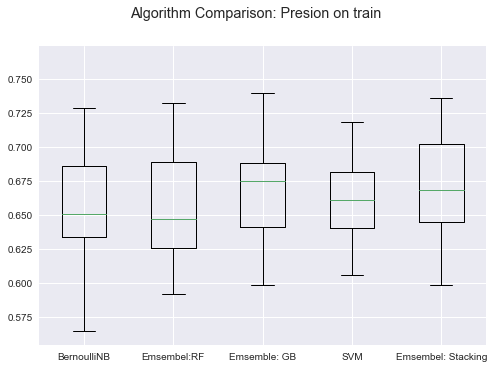

In [40]:
from sklearn import cross_validation
# Spot Check Algorithms
models = []
models.append(('BernoulliNB', BernoulliNB(alpha=0, binarize=0, class_prior=None, fit_prior=True)))
models.append(('Emsembel:RF', RandomForestClassifier(n_estimators=36, max_depth=10, max_features='sqrt', min_samples_leaf = 1)))
models.append(('Emsemble: GB', GradientBoostingClassifier(n_estimators=45, max_depth=15, max_features='sqrt', min_samples_leaf = 6)))
models.append(('SVM',SVC(kernel='linear',C=1)))
models.append(('Emsembel: Stacking',stacking ))

# evaluate each model in turn
results = []
names = []
print '10 fold Cross validaiton report for each model: average Acuuracy and Standardiviation'
print '\n'
for name, model in models:
	cv_results = cross_validation.cross_val_score(model, smote_predictors, smote_target, cv=10)
	results.append(cv_results)
	names.append(name)
    
# boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Presion on train')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# paried t test to compare best model with second best
from scipy import stats
stats.ttest_rel(gbc_scores, rfc_scores,gbc_scores,)

In [ ]:
results=[BNB_scores,rfcb_scores,linear_scores,results]

names=['BernoulliNB','Emsemble: RF','Emsemble: GB','SVM', 'stacking']

# boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Presion on train')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## compare classifiers's prediction performacne on testing set (precision on noshow)

### Model Evaluation

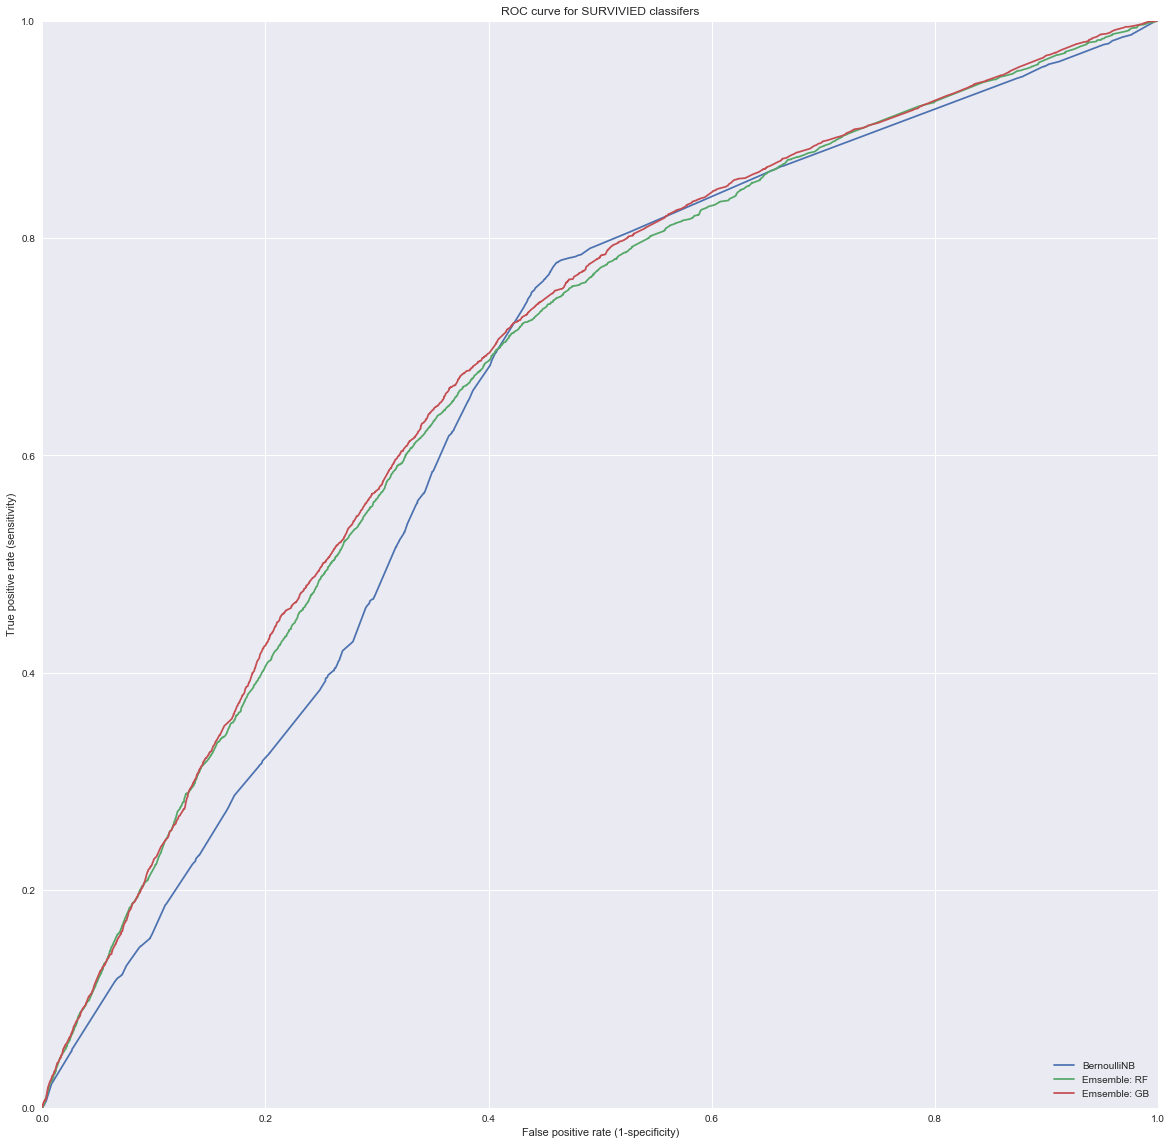

In [84]:
#### ROC Curve


nbP=BNB.predict_proba(x_test2)[:,1]
rfcP=rfcb.predict_proba(x_test2)[:,1]
gbcP=gbc.predict_proba(x_test2)[:,1]
#linearP=linear.predict_proba(x_test2)[:,1]
#stcP=stacking.predict_proba(x_test2)[:,1]



models=[nbP,rfcP,gbcP]
#stcP
label=['BernoulliNB','Emsemble: RF','Emsemble: GB']

from sklearn import metrics
# plotting ROC curves
plt.figure(figsize=(20, 20))

for i in range(len(models)):
    fpr, tpr,thresholds= metrics.roc_curve(y_test2,models[i])
    plt.plot(fpr,tpr,label=label[i])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for SURVIVIED classifers')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

plt.show()

In [71]:
#AUC
from sklearn.metrics import roc_curve, auc, roc_auc_score

roc_auc_score(y_test2, linearP)


0.67390595908312945

## Feature importacne

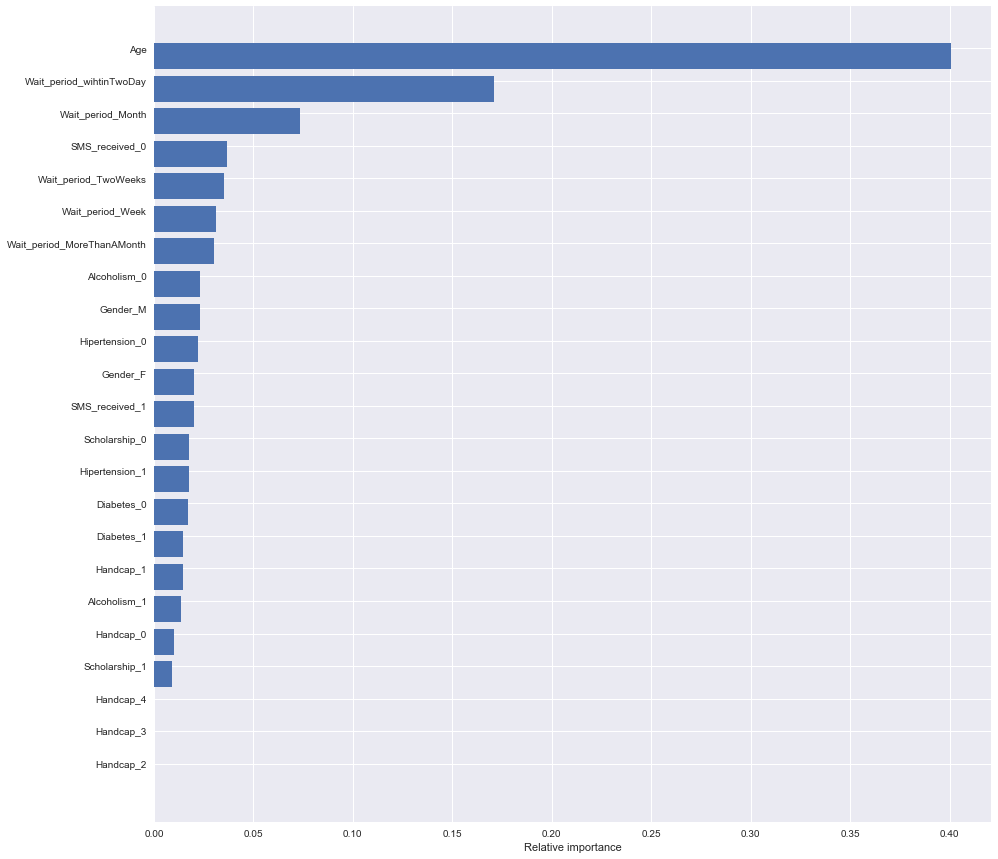

In [87]:
# sort importances
indices = np.argsort(gbc.feature_importances_)
names = list(x_train2)
# plot as bar chart
plt.figure(figsize=(15, 15))
plt.barh(np.arange(len(names)), gbc.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

plt.show()